In [271]:
import pandas as pd
df = pd.read_csv("../evaluations/concept_learning_paper_models.tsv", sep="\t", names=["model", "dataset", "prompt", "random_demos", "informative_demos", "difference"])  # TODO: remove "difference column"

df

,model,dataset,prompt,random_demos,informative_demos,difference
0,trained_models/mt5-3b-tea_random_ch2800,glue/mnli,GPT-3 style,0.43,0.430,NaN
1,trained_models/mt5-3b-tea_random_ch2800,glue/mnli,GPT-3 style,0.39,0.420,NaN
2,trained_models/mt5-3b-tea_random_ch2800,glue/mnli,GPT-3 style,0.44,0.430,NaN
3,trained_models/mt5-3b-tea_random_ch2800,glue/mnli,GPT-3 style,0.41,0.460,NaN
4,trained_models/mt5-3b-tea_random_ch2800,glue/mnli,GPT-3 style,0.45,0.490,NaN
...,...,...,...,...,...,...
23795,authoranonymous321/mt5_large-teabreac-AQA_hard,teabreac,no template,0.12,0.275,NaN
23796,authoranonymous321/mt5_large-teabreac-AQA_hard,teabreac,no template,0.17,0.215,NaN
23797,authoranonymous321/mt5_large-teabreac-AQA_hard,teabreac,no template,0.10,0.230,NaN
23798,authoranonymous321/mt5_large-teabreac-AQA_hard,teabreac,no template,0.10,0.300,NaN


In [272]:
df.groupby(["model", "dataset", "prompt"]).mean().tail(10)

random_demos  \
model                                          dataset               prompt                                        
trained_models/mt5_teabreac-aqa_hard_3b_ch2000 hotpot_qa/fullwiki    generate_answer_interrogative      0.272002   
                                               openbookqa/additional choices                            0.394183   
                                                                     choose_an_answer_with_options      0.395120   
                                                                     only_options                       0.371160   
                                                                     pick_answer_with_options           0.387942   
                                                                     pick_using_id                      0.203000   
                                                                     which_correct                      0.381436   
                                                                     which_correct_inverse              0.355654   
                                               teabreac              no template                        0.020325   
                                               worldtree             no template                        0.477977   

                                                                                                    informative_demos  \
model                                          dataset               prompt                                             
trained_models/mt5_teabreac-aqa_hard_3b_ch2000 hotpot_qa/fullwiki    generate_answer_interrogative           0.285083   
                                               openbookqa/additional choices                                 0.383987   
                                                                     choose_an_answer_with_options           0.395272   
                                                                     only_options                            0.369070   
                                                                     pick_answer_with_options                0.389706   
                                                                     pick_using_id                           0.215600   
                                                                     which_correct                           0.375656   
                                                                     which_correct_inverse                   0.345322   
                                               teabreac              no template                             0.211700   
                                               worldtree             no template                             0.429467   

                                                                                                    difference  
model                                          dataset               prompt                                     
trained_models/mt5_teabreac-aqa_hard_3b_ch2000 hotpot_qa/fullwiki    generate_answer_interrogative         NaN  
                                               openbookqa/additional choices                               NaN  
                                                                     choose_an_answer_with_options         NaN  
                                                                     only_options                          NaN  
                                                                     pick_answer_with_options              NaN  
                                                                     pick_using_id                         NaN  
                                                                     which_correct                         NaN  
                                                                     which_correct_inverse                 NaN  
                                               teabreac              no template                           NaN  
           

In [273]:
df["Performance change"] = df.apply(lambda row: (row["informative_demos"] - row["random_demos"]) / row["informative_demos"] 
                                                 if row["informative_demos"] != 0 else 1, axis=1)

In [274]:
# df.apply(lambda row: str(row["model"]) + str(row["dataset"]), axis=1).value_counts()

In [275]:
max_vals = df.groupby(["model", "dataset", "prompt"]).mean()["informative_demos"].groupby(["model", "dataset"]).idxmax().tolist()

In [276]:
max_vals

[('authoranonymous321/mt5_large-teabreac-AQA_hard', 'teabreac', 'no template'),
 ('authoranonymous321/mt5_large-teabreac-AQA_random',
  'teabreac',
  'no template'),
 ('trained_models/AQA+SQAD_random_large_ch6000',
  'glue/mnli',
  'guaranteed/possible/impossible'),
 ('trained_models/AQA+SQAD_random_large_ch6000',
  'hotpot_qa/fullwiki',
  'generate_answer_interrogative'),
 ('trained_models/AQA+SQAD_random_large_ch6000',
  'openbookqa/additional',
  'choices'),
 ('trained_models/AQA+SQAD_random_large_ch6000', 'worldtree', 'no template'),
 ('trained_models/mt5-3b-tea_hard_ch1600',
  'glue/mnli',
  'consider always/sometimes/never'),
 ('trained_models/mt5-3b-tea_random_ch2800',
  'glue/mnli',
  'always/sometimes/never'),
 ('trained_models/mt5-3b-teabreac-aqa_random_ch2800',
  'hotpot_qa/fullwiki',
  'generate_answer_interrogative'),
 ('trained_models/mt5-3b-teabreac-aqa_random_ch2800',
  'openbookqa/additional',
  'which_correct'),
 ('trained_models/mt5-3b-teabreac-aqa_random_ch2800',
  

In [277]:
df

,model,dataset,prompt,random_demos,informative_demos,difference,Performance change
0,trained_models/mt5-3b-tea_random_ch2800,glue/mnli,GPT-3 style,0.43,0.430,NaN,0.000000
1,trained_models/mt5-3b-tea_random_ch2800,glue/mnli,GPT-3 style,0.39,0.420,NaN,0.071429
2,trained_models/mt5-3b-tea_random_ch2800,glue/mnli,GPT-3 style,0.44,0.430,NaN,-0.023256
3,trained_models/mt5-3b-tea_random_ch2800,glue/mnli,GPT-3 style,0.41,0.460,NaN,0.108696
4,trained_models/mt5-3b-tea_random_ch2800,glue/mnli,GPT-3 style,0.45,0.490,NaN,0.081633
...,...,...,...,...,...,...,...
23795,authoranonymous321/mt5_large-teabreac-AQA_hard,teabreac,no template,0.12,0.275,NaN,0.563636
23796,authoranonymous321/mt5_large-teabreac-AQA_hard,teabreac,no template,0.17,0.215,NaN,0.209302
23797,authoranonymous321/mt5_large-teabreac-AQA_hard,teabreac,no template,0.10,0.230,NaN,0.565217
23798,authoranonymous321/mt5_large-teabreac-AQA_hard,teabreac,no template,0.10,0.300,NaN,0.666667


In [278]:
max_info_df = df[df.apply(lambda row: tuple(row[["model", "dataset", "prompt"]]) in max_vals, axis=1)]
max_info_df

,model,dataset,prompt,random_demos,informative_demos,difference,Performance change
400,trained_models/mt5-3b-tea_random_ch2800,glue/mnli,always/sometimes/never,0.40,0.390,NaN,-0.025641
401,trained_models/mt5-3b-tea_random_ch2800,glue/mnli,always/sometimes/never,0.39,0.450,NaN,0.133333
402,trained_models/mt5-3b-tea_random_ch2800,glue/mnli,always/sometimes/never,0.32,0.600,NaN,0.466667
403,trained_models/mt5-3b-tea_random_ch2800,glue/mnli,always/sometimes/never,0.29,0.500,NaN,0.420000
404,trained_models/mt5-3b-tea_random_ch2800,glue/mnli,always/sometimes/never,0.30,0.480,NaN,0.375000
...,...,...,...,...,...,...,...
23795,authoranonymous321/mt5_large-teabreac-AQA_hard,teabreac,no template,0.12,0.275,NaN,0.563636
23796,authoranonymous321/mt5_large-teabreac-AQA_hard,teabreac,no template,0.17,0.215,NaN,0.209302
23797,authoranonymous321/mt5_large-teabreac-AQA_hard,teabreac,no template,0.10,0.230,NaN,0.565217
23798,authoranonymous321/mt5_large-teabreac-AQA_hard,teabreac,no template,0.10,0.300,NaN,0.666667


In [279]:
max_info_df.model.unique()

array(['trained_models/mt5-3b-tea_random_ch2800',
       'trained_models/mt5-3b-tea_hard_ch1600',
       'trained_models/mt5_teabreac-aqa_hard_3b_ch2000',
       'trained_models/mt5-3b-teabreac-aqa_random_ch2800',
       'trained_models/mt5_teabreac+AQA_hard_large_ch3000',
       'trained_models/AQA+SQAD_random_large_ch6000',
       'authoranonymous321/mt5_large-teabreac-AQA_random',
       'authoranonymous321/mt5_large-teabreac-AQA_hard'], dtype=object)

## Adjustments for plotting into the paper

In [280]:
max_info_df

,model,dataset,prompt,random_demos,informative_demos,difference,Performance change
400,trained_models/mt5-3b-tea_random_ch2800,glue/mnli,always/sometimes/never,0.40,0.390,NaN,-0.025641
401,trained_models/mt5-3b-tea_random_ch2800,glue/mnli,always/sometimes/never,0.39,0.450,NaN,0.133333
402,trained_models/mt5-3b-tea_random_ch2800,glue/mnli,always/sometimes/never,0.32,0.600,NaN,0.466667
403,trained_models/mt5-3b-tea_random_ch2800,glue/mnli,always/sometimes/never,0.29,0.500,NaN,0.420000
404,trained_models/mt5-3b-tea_random_ch2800,glue/mnli,always/sometimes/never,0.30,0.480,NaN,0.375000
...,...,...,...,...,...,...,...
23795,authoranonymous321/mt5_large-teabreac-AQA_hard,teabreac,no template,0.12,0.275,NaN,0.563636
23796,authoranonymous321/mt5_large-teabreac-AQA_hard,teabreac,no template,0.17,0.215,NaN,0.209302
23797,authoranonymous321/mt5_large-teabreac-AQA_hard,teabreac,no template,0.10,0.230,NaN,0.565217
23798,authoranonymous321/mt5_large-teabreac-AQA_hard,teabreac,no template,0.10,0.300,NaN,0.666667


In [281]:
plotted_model_names = {
                       # "allenai/tk-instruct-base-def-pos": "Tk-instruct-0.4B",
                       # "google/flan-t5-base": "Flan-0.4B",
                       "trained_models/AQA+SQAD_random_large_ch6000": "Tk-random-1B", 
                       # "trained_models/mt5_teabreac_random+AQA_random_ch5000": "Tk-random-1B",
                       "trained_models/mt5_teabreac+AQA_hard_large_ch3000": "Tk-CoAT-1B",
                       "authoranonymous321/mt5_large-teabreac-AQA_random":  "Tk-random-1B",  # additional teabreac eval
                       "authoranonymous321/mt5_large-teabreac-AQA_hard": "Tk-CoAT-1B",
                       # "allenai/tk-instruct-large-def-pos": "Tk-instruct-1B",
                       # "google/flan-t5-large": "Flan-1B",
                       # "allenai/tk-instruct-3b-def-pos": "Tk-instruct-3B",
                       # "allenai/mtk-instruct-3b-def-pos": "mTk-instruct-3B",
                       # "bigscience/T0_3B": "T0-3B",
                       # "google/flan-t5-xl": "Flan-3B",
                       # "allenai/tk-instruct-11b-def-pos": "Tk-instruct-11B",
                       # "bigscience/T0pp": "T0-11B",
                       # "google/flan-t5-xxl": "Flan-11B",
                       # "davinci": "GPT3-175B",
                       # "text-davinci-003": "InstructGPT-175B",
                       "trained_models/mt5-3b-tea_random_ch2800": "Tk-random-3B",  # incorrect naming convention, but correct mv by bash history
                       "trained_models/mt5-3b-teabreac-aqa_random_ch2800": "Tk-random-3B",  # Equivalent to previous -- we moved the model on alfa
                       "trained_models/mt5_teabreac-aqa_hard_3b_ch2000": "Tk-CoAT-3B"  # we're still computing this one
}

plotted_df = pd.DataFrame()

for current_id, new_id in plotted_model_names.items():
    orig_df = max_info_df[max_info_df["model"] == current_id] 
    new_df = orig_df.copy()
    new_df["model"] = new_id
    
    plotted_df = pd.concat([plotted_df, new_df])

plotted_df.head()

,model,dataset,prompt,random_demos,informative_demos,difference,Performance change
20400,Tk-random-1B,glue/mnli,guaranteed/possible/impossible,0.34,0.39,0.05,0.128205
20401,Tk-random-1B,glue/mnli,guaranteed/possible/impossible,0.32,0.51,0.19,0.372549
20402,Tk-random-1B,glue/mnli,guaranteed/possible/impossible,0.28,0.52,0.24,0.461538
20403,Tk-random-1B,glue/mnli,guaranteed/possible/impossible,0.37,0.63,0.26,0.412698
20404,Tk-random-1B,glue/mnli,guaranteed/possible/impossible,0.32,0.56,0.24,0.428571


In [285]:
unique_datasets = set(model_df.dataset.unique())

for model_id in plotted_model_names.values():
    model_df = plotted_df[plotted_df.model == model_id]
    assert len(model_df)
    for dataset_id in unique_datasets:
        assert dataset_id in model_df.dataset.unique(), "Dataset %s not found among evaluations of model %s" % (dataset_id, model_id)

In [287]:
plotted_df[plotted_df.model == model_id].dataset.unique()

array(['glue/mnli', 'openbookqa/additional', 'hotpot_qa/fullwiki',
       'worldtree', 'teabreac'], dtype=object)

## Actual plotting

In [288]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [289]:
print(sns.color_palette("Paired").as_hex())

['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928']


In [295]:
colors = ['#fb9a99', '#b2df8a', '#e31a1c', '#33a02c']

sns.set(rc={'figure.figsize': (6.3, 3.5)})
# sns.set(rc={'figure.figsize': (10, 8)})
sns.set(style="whitegrid")

sns.set_palette(sns.color_palette(colors))

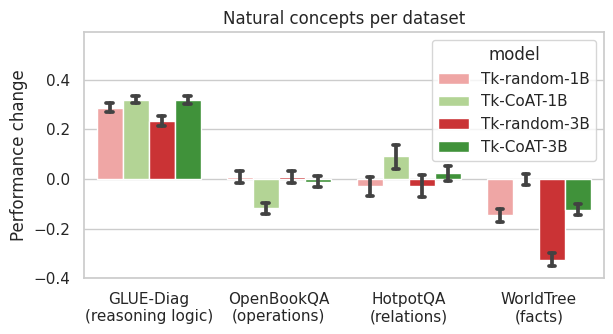

In [296]:
plt.xticks(rotation=90)
plt.title("Natural concepts per dataset")

g = sns.barplot(data=plotted_df[plotted_df.dataset != "teabreac"], x="dataset", y="Performance change", hue="model", capsize=0.05)
g.set_xticklabels(["GLUE-Diag\n(reasoning logic)", "OpenBookQA\n(operations)", "HotpotQA\n(relations)", "WorldTree\n(facts)"], rotation=0)

g.set(xlabel=None)
# g.set(ylabel=None)

# plt.legend([],[], frameon=False)
plt.tight_layout()
plt.ylim((-0.4, 0.59))

plt.savefig("concept_learning_per_dataset.pdf", format="pdf")

In [379]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': (2.5*1.15, 4.3*0.9)})
# sns.set(rc={'figure.figsize': (10, 8)})
sns.set(style="whitegrid")

colors = ['#fb9a99', '#b2df8a', '#e31a1c', '#33a02c']
sns.set_palette(sns.color_palette(colors))

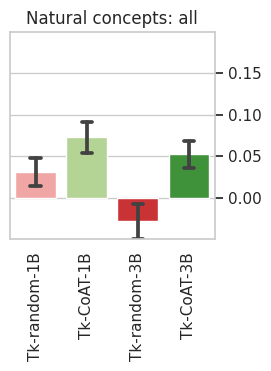

In [382]:
plt.xticks(rotation=90)
plt.title("Natural concepts: all")

g = sns.barplot(data=plotted_df[plotted_df.dataset != "teabreac"], x="model", y="Performance change", errorbar="ci", capsize=0.2)
g.set(xlabel=None)
# g.set(ylabel=None)
plt.ylim((-0.0499, 0.199))
g.set(ylabel=None)
g.yaxis.tick_right()

plt.tight_layout()

plt.legend([],[], frameon=False)
plt.savefig("concept_learning_average_v2.pdf", format="pdf")

In [377]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': (2.8*1.15, 4.3*0.9)})
# sns.set(rc={'figure.figsize': (10, 8)})
sns.set(style="whitegrid")

colors = ['#fb9a99', '#b2df8a', '#e31a1c', '#33a02c']
sns.set_palette(sns.color_palette(colors))

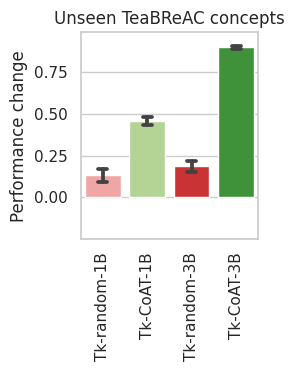

In [381]:
plt.xticks(rotation=90)
plt.title("Unseen TeaBReAC concepts")

g = sns.barplot(data=plotted_df[plotted_df.dataset == "teabreac"], x="model", y="Performance change", errorbar="ci", capsize=0.2)

g.set(xlabel=None)
# g.set(yticklabels=[])
# g.set(ylabel=None)
# g.yaxis.tick_right()

plt.ylim((-0.249, 0.99))
# plt.tick_params(axis='y', which='both', labelleft='off', labelright='on')

plt.tight_layout()

plt.legend([],[], frameon=False)

plt.savefig("concept_learning_teabreac_v2.pdf", format="pdf")